In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mengimpor library


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [ ]:
# import dataset kedalam pandas dataframe
df = pd.read_csv('drive/MyDrive/dataset/Storms_2020.csv')

<ipython-input-5-ed4cb0b307e4>:2: DtypeWarning: Columns (21,22,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('drive/MyDrive/dataset/Storms_2020.csv')


In [ ]:
# Menampilkan attribut dari dataset

df.columns

Index(['episode_id', 'event_id', 'state', 'state_fips_code', 'event_type',
       'cz_type', 'cz_fips_code', 'cz_name', 'wfo', 'event_begin_time',
       'event_timezone', 'event_end_time', 'injuries_direct',
       'injuries_indirect', 'deaths_direct', 'deaths_indirect',
       'damage_property', 'damage_crops', 'source', 'magnitude',
       'magnitude_type', 'flood_cause', 'tor_f_scale', 'tor_length',
       'tor_width', 'tor_other_wfo', 'location_index', 'event_range',
       'event_azimuth', 'reference_location', 'event_latitude',
       'event_longitude', 'event_point'],
      dtype='object')

In [ ]:
df['event_type'].unique()

array(['hail', 'heat', 'flood', 'sleet', 'drought', 'tornado', 'blizzard',
       'wildfire', 'avalanche', 'dense fog', 'high surf', 'high wind',
       'hurricane', 'ice storm', 'lightning', 'dust devil', 'dust storm',
       'heavy rain', 'heavy snow', 'waterspout', 'debris flow',
       'flash flood', 'marine hail', 'rip current', 'strong wind',
       'freezing fog', 'frost/freeze', 'funnel cloud', 'winter storm',
       'coastal flood', 'excessive heat', 'tropical storm',
       'winter weather', 'cold/wind chill', 'lakeshore flood',
       'lake-effect snow', 'marine dense fog', 'marine high wind',
       'storm surge/tide', 'thunderstorm wind', 'marine strong wind',
       'tropical depression', 'astronomical low tide',
       'marine tropical storm', 'extreme cold/wind chill',
       'marine hurricane/typhoon', 'marine thunderstorm wind'],
      dtype=object)

In [ ]:
# Menghapus attribute yang tidak perlukan

df = df.drop([
    "episode_id",
    "event_id",
    "cz_name",
    "wfo",
    "cz_type",
    "event_begin_time",
    "event_timezone",
    "event_end_time",
    "injuries_direct",
    "injuries_indirect",
    "deaths_direct",
    "deaths_indirect",
    "damage_crops",
    "flood_cause",
    "tor_f_scale",
    "tor_length",
    "tor_width",
    "tor_other_wfo",
    "event_point",
    "location_index",
    ], axis=1)

In [ ]:
# Menampilkan attribut yang sudah dibersihkan

df.columns

Index(['state', 'state_fips_code', 'event_type', 'cz_fips_code',
       'damage_property', 'source', 'magnitude', 'magnitude_type',
       'event_range', 'event_azimuth', 'reference_location', 'event_latitude',
       'event_longitude'],
      dtype='object')

In [ ]:
df.columns

Index(['state', 'state_fips_code', 'event_type', 'cz_fips_code',
       'damage_property', 'source', 'magnitude', 'magnitude_type',
       'event_range', 'event_azimuth', 'reference_location', 'event_latitude',
       'event_longitude'],
      dtype='object')

In [ ]:
# menfilter attribute eventy_type yang berisi thunderstorm wind
df = df.loc[df['event_type'] == 'thunderstorm wind']
df = df.drop(["event_type"], axis=1)

In [ ]:
# drop data dengan value NaN
df = df.dropna()

In [ ]:
df

,state,state_fips_code,cz_fips_code,damage_property,source,magnitude,magnitude_type,event_range,event_azimuth,reference_location,event_latitude,event_longitude
23374,Oklahoma,40,135,2000.0,Emergency Manager,61.0,EG,1.02,SSE,SALLISAW,35.4575,-94.7904
23375,Ohio,39,1,1000.0,Emergency Manager,50.0,EG,0.13,S,ROME,38.6681,-83.3798
23376,Ohio,39,145,20000.0,Emergency Manager,60.0,EG,1.25,W,PORTSMOUTH,38.7325,-83.0029
23377,Ohio,39,25,3000.0,Law Enforcement,50.0,EG,0.54,E,HULINGTON,38.9800,-84.1600
23378,Ohio,39,1,4000.0,Law Enforcement,50.0,EG,1.75,ESE,LOUDEN,39.0200,-83.4200
...,...,...,...,...,...,...,...,...,...,...,...,...
37829,Illinois,17,19,0.0,Emergency Manager,52.0,EG,0.00,NW,THOMASBORO,40.2300,-88.1800
37830,Illinois,17,167,100000.0,Emergency Manager,61.0,EG,0.00,N,AUBURN,39.5800,-89.7500
37831,Illinois,17,19,175000.0,Emergency Manager,52.0,EG,0.00,SE,THOMASBORO,40.2300,-88.1800
37832,Illinois,17,167,70000.0,Emergency Manager,61.0,EG,2.00,N,PAWNEE,39.6090,-89.5800


In [ ]:
df.dtypes

state                  object
state_fips_code         int64
cz_fips_code            int64
damage_property       float64
source                 object
magnitude             float64
magnitude_type         object
event_range           float64
event_azimuth          object
reference_location     object
event_latitude        float64
event_longitude       float64
dtype: object

In [ ]:
df['state'].unique()

array(['Oklahoma', 'Ohio', 'Kentucky', 'Tennessee', 'Indiana', 'Texas',
       'Alabama', 'North carolina', 'South carolina', 'West virginia',
       'Virginia', 'Arkansas', 'Missouri', 'Illinois', 'Louisiana',
       'Florida', 'Georgia', 'Pennsylvania', 'Maryland', 'Delaware',
       'New jersey', 'Vermont', 'New york', 'Mississippi', 'North dakota',
       'New mexico', 'Massachusetts', 'Rhode island', 'Wisconsin',
       'Michigan', 'Montana', 'Oregon', 'Kansas', 'Colorado', 'Utah',
       'Washington', 'Connecticut', 'Minnesota', 'District of columbia',
       'South dakota', 'Arizona', 'Nebraska', 'Nevada', 'Iowa',
       'California', 'Idaho', 'Wyoming', 'New hampshire', 'Puerto rico',
       'Maine'], dtype=object)

In [ ]:
a = df['state'].astype('category')
b = df['source'].astype('category')
c = df['magnitude_type'].astype('category')
d = df['event_azimuth'].astype('category')
e = df['reference_location'].astype('category')
df['state'] = df['state'].astype('category')
df['source'] = df['source'].astype('category')
df['magnitude_type'] = df['magnitude_type'].astype('category')
df['event_azimuth'] = df['event_azimuth'].astype('category')
df['reference_location'] = df['reference_location'].astype('category')

cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [ ]:
category_mapping = dict(zip(a, df['state']))
print(category_mapping)

category_mapping = dict(zip(b, df['source']))
print(category_mapping)

category_mapping = dict(zip(c, df['magnitude_type']))
print(category_mapping)

category_mapping = dict(zip(d, df['event_azimuth']))
print(category_mapping)

category_mapping = dict(zip(e, df['reference_location']))
print(category_mapping)

{'Oklahoma': 34, 'Ohio': 33, 'Kentucky': 15, 'Tennessee': 41, 'Indiana': 12, 'Texas': 42, 'Alabama': 0, 'North carolina': 31, 'South carolina': 39, 'West virginia': 47, 'Virginia': 45, 'Arkansas': 2, 'Missouri': 23, 'Illinois': 11, 'Louisiana': 16, 'Florida': 8, 'Georgia': 9, 'Pennsylvania': 36, 'Maryland': 18, 'Delaware': 6, 'New jersey': 28, 'Vermont': 44, 'New york': 30, 'Mississippi': 22, 'North dakota': 32, 'New mexico': 29, 'Massachusetts': 19, 'Rhode island': 38, 'Wisconsin': 48, 'Michigan': 20, 'Montana': 24, 'Oregon': 35, 'Kansas': 14, 'Colorado': 4, 'Utah': 43, 'Washington': 46, 'Connecticut': 5, 'Minnesota': 21, 'District of columbia': 7, 'South dakota': 40, 'Arizona': 1, 'Nebraska': 25, 'Nevada': 26, 'Iowa': 13, 'California': 3, 'Idaho': 10, 'Wyoming': 49, 'New hampshire': 27, 'Puerto rico': 37, 'Maine': 17}
{'Emergency Manager': 12, 'Law Enforcement': 15, 'AWOS': 2, 'Public': 26, 'Broadcast Media': 5, 'ASOS': 1, 'Park/Forest Service': 24, 'Utility Company': 34, '911 Call C

In [ ]:
df.dtypes

state                    int8
state_fips_code         int64
cz_fips_code            int64
damage_property       float64
source                   int8
magnitude             float64
magnitude_type           int8
event_range           float64
event_azimuth            int8
reference_location      int16
event_latitude        float64
event_longitude       float64
dtype: object

In [ ]:
df

,state,state_fips_code,cz_fips_code,damage_property,source,magnitude,magnitude_type,event_range,event_azimuth,reference_location,event_latitude,event_longitude
23374,34,40,135,2000.0,12,61.0,0,1.02,10,5055,35.4575,-94.7904
23375,33,39,1,1000.0,12,50.0,0,0.13,8,4963,38.6681,-83.3798
23376,33,39,145,20000.0,12,60.0,0,1.25,13,4663,38.7325,-83.0029
23377,33,39,25,3000.0,15,50.0,0,0.54,0,2875,38.9800,-84.1600
23378,33,39,1,4000.0,15,50.0,0,1.75,2,3440,39.0200,-83.4200
...,...,...,...,...,...,...,...,...,...,...,...,...
37829,11,17,19,0.0,12,52.0,0,0.00,7,5690,40.2300,-88.1800
37830,11,17,167,100000.0,12,61.0,0,0.00,3,445,39.5800,-89.7500
37831,11,17,19,175000.0,12,52.0,0,0.00,9,5690,40.2300,-88.1800
37832,11,17,167,70000.0,12,61.0,0,2.00,3,4437,39.6090,-89.5800


In [ ]:
bins = [0, 1000.0, 10000.0, 100000.0, 8000000.0]
labels = ["Minor", "Moderate", "Severe", "Catastrophic"]
df['damage_property'] = pd.cut(df['damage_property'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
df['damage_property'].value_counts()

Minor           6177
Moderate        2621
Severe           814
Catastrophic     111
Name: damage_property, dtype: int64

In [ ]:
df

,state,state_fips_code,cz_fips_code,damage_property,source,magnitude,magnitude_type,event_range,event_azimuth,reference_location,event_latitude,event_longitude
23374,34,40,135,Moderate,12,61.0,0,1.02,10,5055,35.4575,-94.7904
23375,33,39,1,Minor,12,50.0,0,0.13,8,4963,38.6681,-83.3798
23376,33,39,145,Severe,12,60.0,0,1.25,13,4663,38.7325,-83.0029
23377,33,39,25,Moderate,15,50.0,0,0.54,0,2875,38.9800,-84.1600
23378,33,39,1,Moderate,15,50.0,0,1.75,2,3440,39.0200,-83.4200
...,...,...,...,...,...,...,...,...,...,...,...,...
37829,11,17,19,Minor,12,52.0,0,0.00,7,5690,40.2300,-88.1800
37830,11,17,167,Severe,12,61.0,0,0.00,3,445,39.5800,-89.7500
37831,11,17,19,Catastrophic,12,52.0,0,0.00,9,5690,40.2300,-88.1800
37832,11,17,167,Severe,12,61.0,0,2.00,3,4437,39.6090,-89.5800


In [ ]:
X = df.drop(['damage_property'],axis=1).values
y = df['damage_property'].values

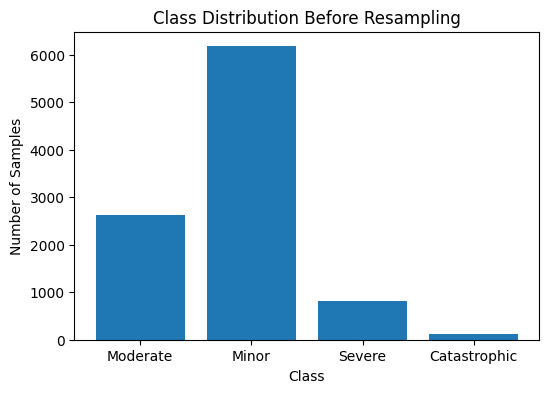

In [ ]:
from collections import Counter

plt.figure(figsize=(6, 4))
plt.bar(Counter(y).keys(), Counter(y).values())
plt.title('Class Distribution Before Resampling')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

After resampling: Counter({'Moderate': 6177, 'Minor': 6177, 'Severe': 6177, 'Catastrophic': 6177})


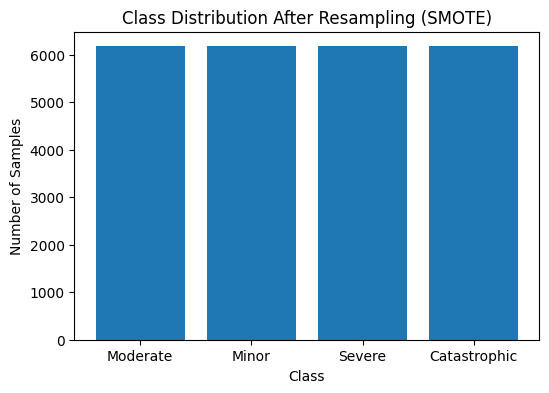

In [ ]:
from imblearn.over_sampling import SMOTE

# Melakukan oversampling menggunakan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print('After resampling:', Counter(y_resampled))

# Menunjukkan distribusi kelas setelah resampling
plt.figure(figsize=(6, 4))
plt.bar(Counter(y_resampled).keys(), Counter(y_resampled).values())
plt.title('Class Distribution After Resampling (SMOTE)')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(
                                                  X_resampled,
                                                  y_resampled,
                                                  test_size=0.3,
                                                  shuffle=True,
                                                 )

In [ ]:
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
damage_pred = model1.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, damage_pred)
print(accuracy)

0.8506677458518819


In [ ]:
print(classification_report(y_test, damage_pred))

              precision    recall  f1-score   support

Catastrophic       0.95      0.99      0.97      1763
       Minor       0.85      0.83      0.84      1911
    Moderate       0.76      0.77      0.77      1855
      Severe       0.84      0.82      0.83      1884

    accuracy                           0.85      7413
   macro avg       0.85      0.85      0.85      7413
weighted avg       0.85      0.85      0.85      7413



In [ ]:
cm1 = confusion_matrix(y_test,damage_pred,labels=model1.classes_)

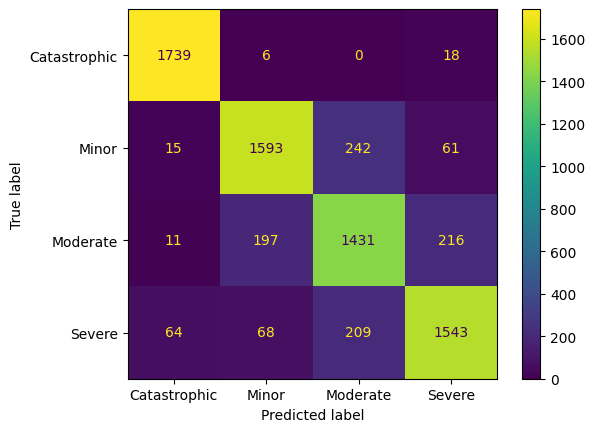

In [ ]:
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=model1.classes_)
disp1.plot()
plt.show()

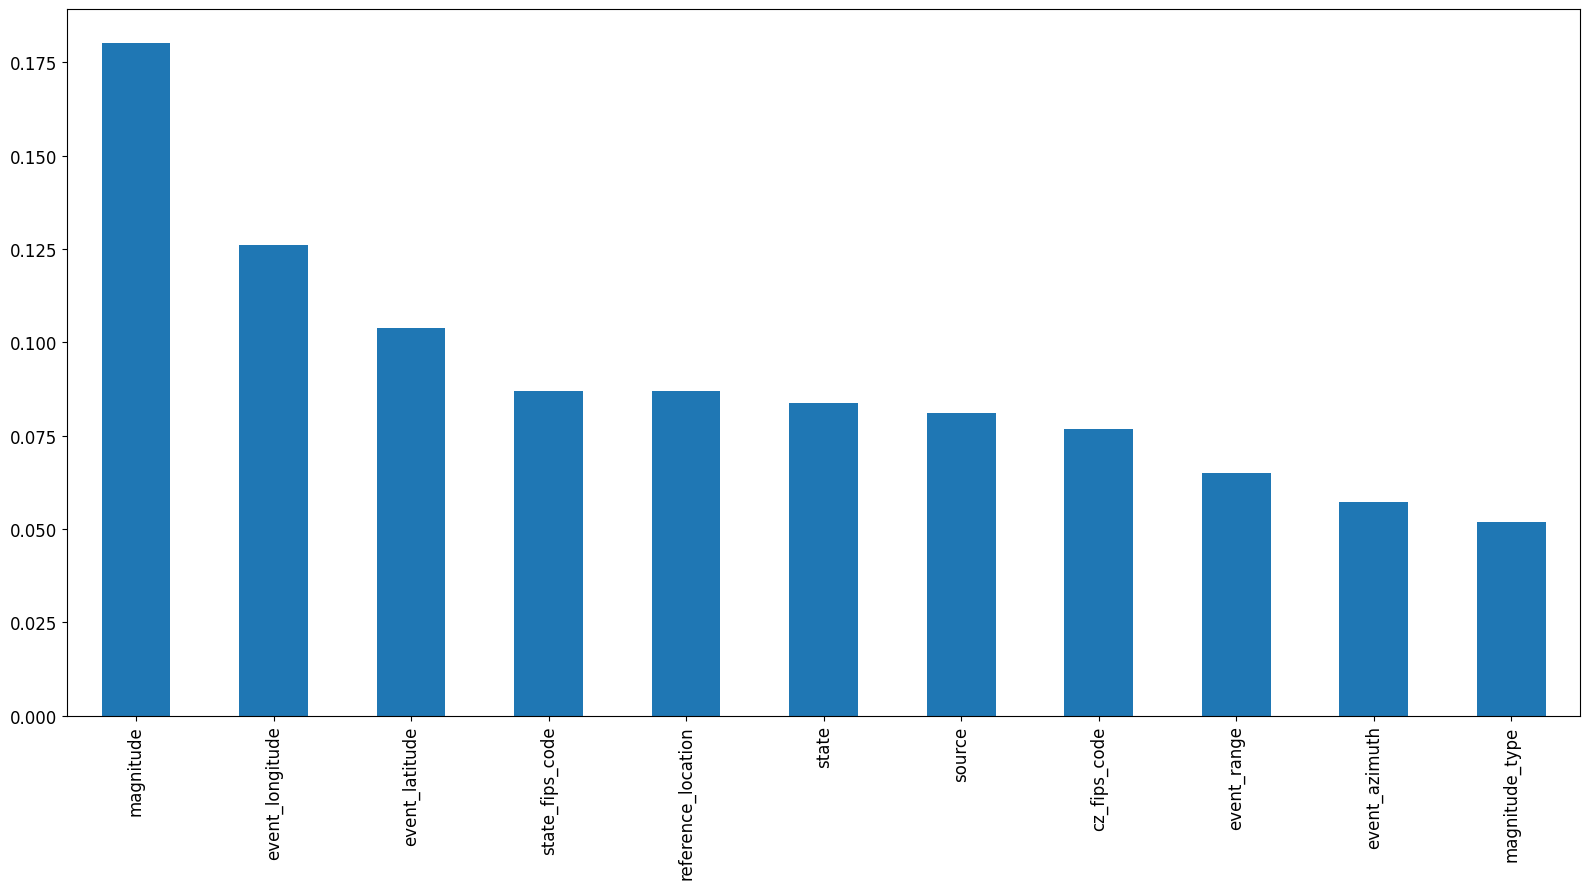

In [ ]:
#Feature Importances

importances = model1.feature_importances_
cols = df.columns.tolist()
del cols[3]
f_importances = pd.Series(importances,cols)
f_importances.sort_values(ascending=False, inplace=True)
f_importances[:11].plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=90, fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
import pickle


In [ ]:
# export model
filename = "dmg-pred.pkl"
pickle.dump(model1, open(filename, "wb"))

In [ ]:
# predict model
loaded_model = pickle.load(open("dmg-pred.pkl", "rb"))
loaded_model.predict(X[0:1])

array(['Moderate'], dtype=object)